In [1]:
# Importer les bibliothèques nécessaires :
import pandas as pd 
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Chargez la base de données "Adult" dans un DataFrame pandas :
data = pd.read_csv('german_credit_data.csv') 

# Affichage des 5 premières lignes des données
data.head(4)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment


In [3]:
# structure de la dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


c:\users\chahid\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


<AxesSubplot:xlabel='Age'>

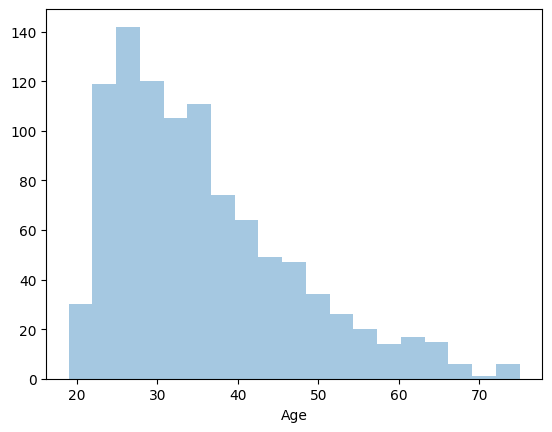

In [5]:
# distribution des ages
sns.distplot(data['Age'],kde=False)

In [6]:
# Creation de categories d'ages
data.loc[(data['Age']<=35),'Age_group'] = 'young'
data.loc[(data['Age']>35)& (data['Age']<=55),'Age_group'] = 'entre 35 et 55'
data.loc[(data['Age']>55),'Age_group'] = 'olders'

data['Age_group']

0              olders
1               young
2      entre 35 et 55
3      entre 35 et 55
4      entre 35 et 55
            ...      
995             young
996    entre 35 et 55
997    entre 35 et 55
998             young
999             young
Name: Age_group, Length: 1000, dtype: object

In [8]:
# Test d'egalite des variances
stats.levene(data[data.Age_group == 'young']['Credit amount'],
             data[data.Age_group == 'entre 35 et 55']['Credit amount'],
             data[data.Age_group == 'olders']['Credit amount'],
            center = "mean")

LeveneResult(statistic=4.151351752598996, pvalue=0.016016088271082484)

In [9]:
# test de l'Anova
stats.f_oneway(data[data.Age_group == 'young']['Credit amount'],
             data[data.Age_group == 'entre 35 et 55']['Credit amount'],
             data[data.Age_group == 'olders']['Credit amount'])

F_onewayResult(statistic=0.43438317313824976, pvalue=0.6477865555336917)